<a href="https://colab.research.google.com/github/dinesh052003/identifying-airline-passenger-satisfaction/blob/main/identifying_airline_passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

from ipywidgets import interactive

In [ ]:
df = pd.read_csv('/content/test1.csv')

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,1,90035,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18270,18270,67635,Female,Loyal Customer,39.0,Business travel,Business,1188.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,0.0,0.0,satisfied
18271,18271,39133,Male,Loyal Customer,44.0,Business travel,Eco,119.0,4.0,1.0,...,4.0,4.0,3.0,3.0,5.0,1.0,4.0,15.0,0.0,satisfied
18272,18272,123438,Male,disloyal Customer,26.0,Business travel,Business,2296.0,3.0,3.0,...,5.0,5.0,2.0,5.0,3.0,5.0,5.0,9.0,3.0,neutral or dissatisfied
18273,18273,44128,Female,disloyal Customer,41.0,Business travel,Business,74.0,4.0,5.0,...,4.0,1.0,5.0,4.0,3.0,2.0,4.0,0.0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18275 entries, 0 to 18274
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18275 non-null  int64  
 1   id                                 18275 non-null  int64  
 2   Gender                             18275 non-null  object 
 3   Customer Type                      18275 non-null  object 
 4   Age                                18274 non-null  float64
 5   Type of Travel                     18274 non-null  object 
 6   Class                              18274 non-null  object 
 7   Flight Distance                    18274 non-null  float64
 8   Inflight wifi service              18274 non-null  float64
 9   Departure/Arrival time convenient  18274 non-null  float64
 10  Ease of Online booking             18274 non-null  float64
 11  Gate location                      18274 non-null  flo

In [ ]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Returning Customer','disloyal Customer':'First-time Customer'})

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

<ipython-input-7-34fd2b6cd3d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18214 entries, 0 to 18273
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18214 non-null  int64  
 1   id                                 18214 non-null  int64  
 2   Gender                             18214 non-null  object 
 3   Customer Type                      18214 non-null  object 
 4   Age                                18214 non-null  float64
 5   Type of Travel                     18214 non-null  object 
 6   Class                              18214 non-null  object 
 7   Flight Distance                    18214 non-null  float64
 8   Inflight wifi service              18214 non-null  float64
 9   Departure/Arrival time convenient  18214 non-null  float64
 10  Ease of Online booking             18214 non-null  float64
 11  Gate location                      18214 non-null  flo

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000,18214.000000
mean,9135.221313,64897.553915,39.708686,1192.811848,2.730921,3.047656,2.760569,2.975513,3.221752,3.264851,3.449325,3.367025,3.383222,3.349347,3.630669,3.309268,3.651147,3.286922,14.299989,14.797134
std,5273.775798,37720.799413,15.113375,998.032560,1.334930,1.530679,1.407926,1.279891,1.325749,1.348477,1.315800,1.330711,1.285371,1.313449,1.175401,1.269592,1.178035,1.313249,36.765798,37.150677
min,0.000000,20.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4571.250000,31665.750000,27.000000,417.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,9136.500000,65191.500000,40.000000,846.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,13700.750000,97725.750000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,18273.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


In [ ]:
df = df.rename(columns={'Leg room service':'Leg room'})

In [ ]:
from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [ ]:
df

,Unnamed: 0,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,...,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,0,19556,Female,Returning Customer,52.0,Business travel,Eco,160.0,5.0,4.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,1,90035,Female,Returning Customer,36.0,Business travel,Business,2863.0,1.0,1.0,...,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,2,12360,Male,First-time Customer,20.0,Business travel,Eco,192.0,2.0,0.0,...,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,3,77959,Male,Returning Customer,44.0,Business travel,Business,3377.0,0.0,0.0,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,4,36875,Female,Returning Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18269,18269,9569,Female,First-time Customer,27.0,Business travel,Business,229.0,2.0,2.0,...,3.0,3.0,2.0,5.0,4.0,5.0,3.0,0.0,0.0,neutral or dissatisfied
18270,18270,67635,Female,Returning Customer,39.0,Business travel,Business,1188.0,5.0,5.0,...,4.0,4.0,4.0,4.0,5.0,4.0,5.0,0.0,0.0,satisfied
18271,18271,39133,Male,Returning Customer,44.0,Business travel,Eco,119.0,4.0,1.0,...,4.0,4.0,3.0,3.0,5.0,1.0,4.0,15.0,0.0,satisfied
18272,18272,123438,Male,First-time Customer,26.0,Business travel,Business,2296.0,3.0,3.0,...,5.0,5.0,2.0,5.0,3.0,5.0,5.0,9.0,3.0,neutral or dissatisfied


In [ ]:
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/Arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)&(df['Online Boarding']!=0)&(df['Seat Comfort']!=0)&(df['Inflight Entertainment']!=0)&(df['On-board Service']!=0)&(df['Leg Room']!=0)&(df['Baggage Handling']!=0)&(df['Checkin Service']!=0)&(df['Inflight Service']!=0)&(df['Cleanliness']!=0)]

In [ ]:
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']

<ipython-input-14-acc327e05e1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})


In [ ]:
DF = df.copy()
df = df.drop('Id',axis=1)

In [ ]:
df = df.reindex(columns=['Satisfaction']+list(df.columns)[:-2]+['Total Delay'])
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'],axis=1)

In [ ]:
df['Satisfaction'].value_counts(normalize=True)

0    0.569544
1    0.430456
Name: Satisfaction, dtype: float64

In [ ]:
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [ ]:
df

,Satisfaction,Unnamed: 0,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,...,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay
0,1,0,Female,Returning Customer,52.0,Business travel,Economy,160.0,5.0,4.0,...,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,94.0
1,1,1,Female,Returning Customer,36.0,Business travel,Business,2863.0,1.0,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0
2,1,4,Female,Returning Customer,49.0,Business travel,Economy,1182.0,2.0,3.0,...,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,20.0
3,1,5,Male,Returning Customer,16.0,Business travel,Economy,311.0,3.0,3.0,...,5.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0,5.0,0.0
4,1,6,Female,Returning Customer,77.0,Business travel,Business,3987.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,0,18269,Female,First-time Customer,27.0,Business travel,Business,229.0,2.0,2.0,...,2.0,3.0,3.0,3.0,2.0,5.0,4.0,5.0,3.0,0.0
16748,1,18270,Female,Returning Customer,39.0,Business travel,Business,1188.0,5.0,5.0,...,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,0.0
16749,1,18271,Male,Returning Customer,44.0,Business travel,Economy,119.0,4.0,1.0,...,4.0,4.0,4.0,4.0,3.0,3.0,5.0,1.0,4.0,15.0
16750,0,18272,Male,First-time Customer,26.0,Business travel,Business,2296.0,3.0,3.0,...,3.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,5.0,12.0


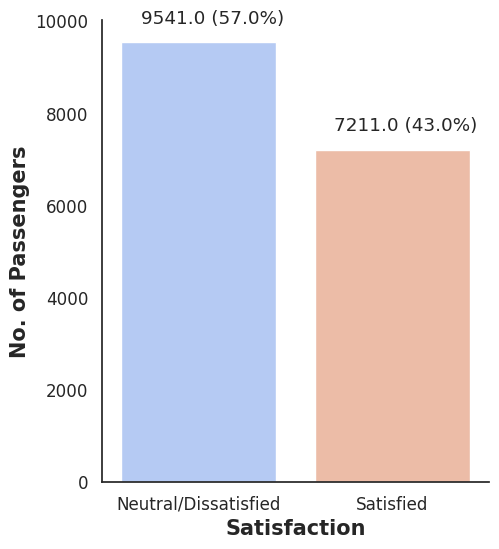

In [ ]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

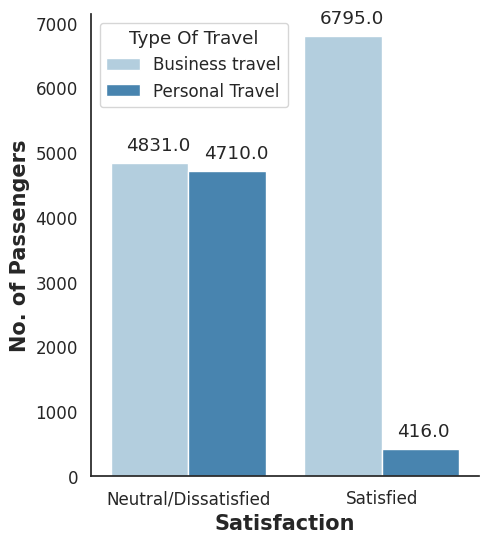

In [ ]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Type Of Travel',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

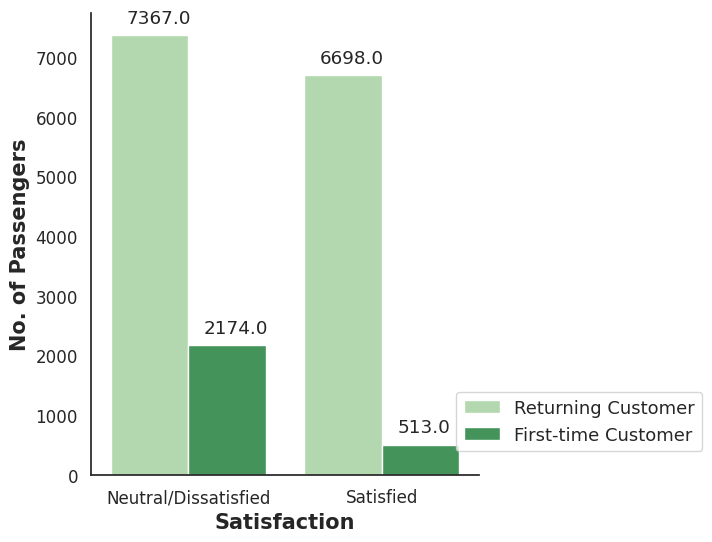

In [ ]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Customer Type',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

In [ ]:
df1 = pd.get_dummies(df,columns=['Gender','Customer Type','Type Of Travel','Class'],drop_first=True)
df1

,Satisfaction,Unnamed: 0,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,...,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Gender_Male,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,1,0,52.0,160.0,5.0,4.0,3.0,4.0,3.0,4.0,...,5.0,5.0,2.0,5.0,5.0,94.0,0,1,0,1
1,1,1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,...,4.0,4.0,3.0,4.0,5.0,0.0,0,1,0,0
2,1,4,49.0,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,...,2.0,2.0,4.0,2.0,4.0,20.0,0,1,0,1
3,1,5,16.0,311.0,3.0,3.0,3.0,3.0,5.0,5.0,...,3.0,1.0,1.0,2.0,5.0,0.0,1,1,0,1
4,1,6,77.0,3987.0,5.0,5.0,5.0,5.0,3.0,5.0,...,5.0,5.0,4.0,5.0,3.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,0,18269,27.0,229.0,2.0,2.0,2.0,4.0,3.0,2.0,...,2.0,5.0,4.0,5.0,3.0,0.0,0,0,0,0
16748,1,18270,39.0,1188.0,5.0,5.0,5.0,5.0,5.0,4.0,...,4.0,4.0,5.0,4.0,5.0,0.0,0,1,0,0
16749,1,18271,44.0,119.0,4.0,1.0,1.0,1.0,4.0,4.0,...,3.0,3.0,5.0,1.0,4.0,15.0,1,1,0,1
16750,0,18272,26.0,2296.0,3.0,3.0,3.0,1.0,5.0,3.0,...,2.0,5.0,3.0,5.0,5.0,12.0,1,0,0,0


In [ ]:
df['Inflight Wifi Service'].value_counts()

2.0    4310
3.0    4304
4.0    3318
1.0    2912
5.0    1908
Name: Inflight Wifi Service, dtype: int64

In [ ]:
group = df1.groupby(['Satisfaction','Class_Economy'])['Class_Economy'].count()
group

Satisfaction  Class_Economy
0             0                2577
              1                6964
1             0                5615
              1                1596
Name: Class_Economy, dtype: int64

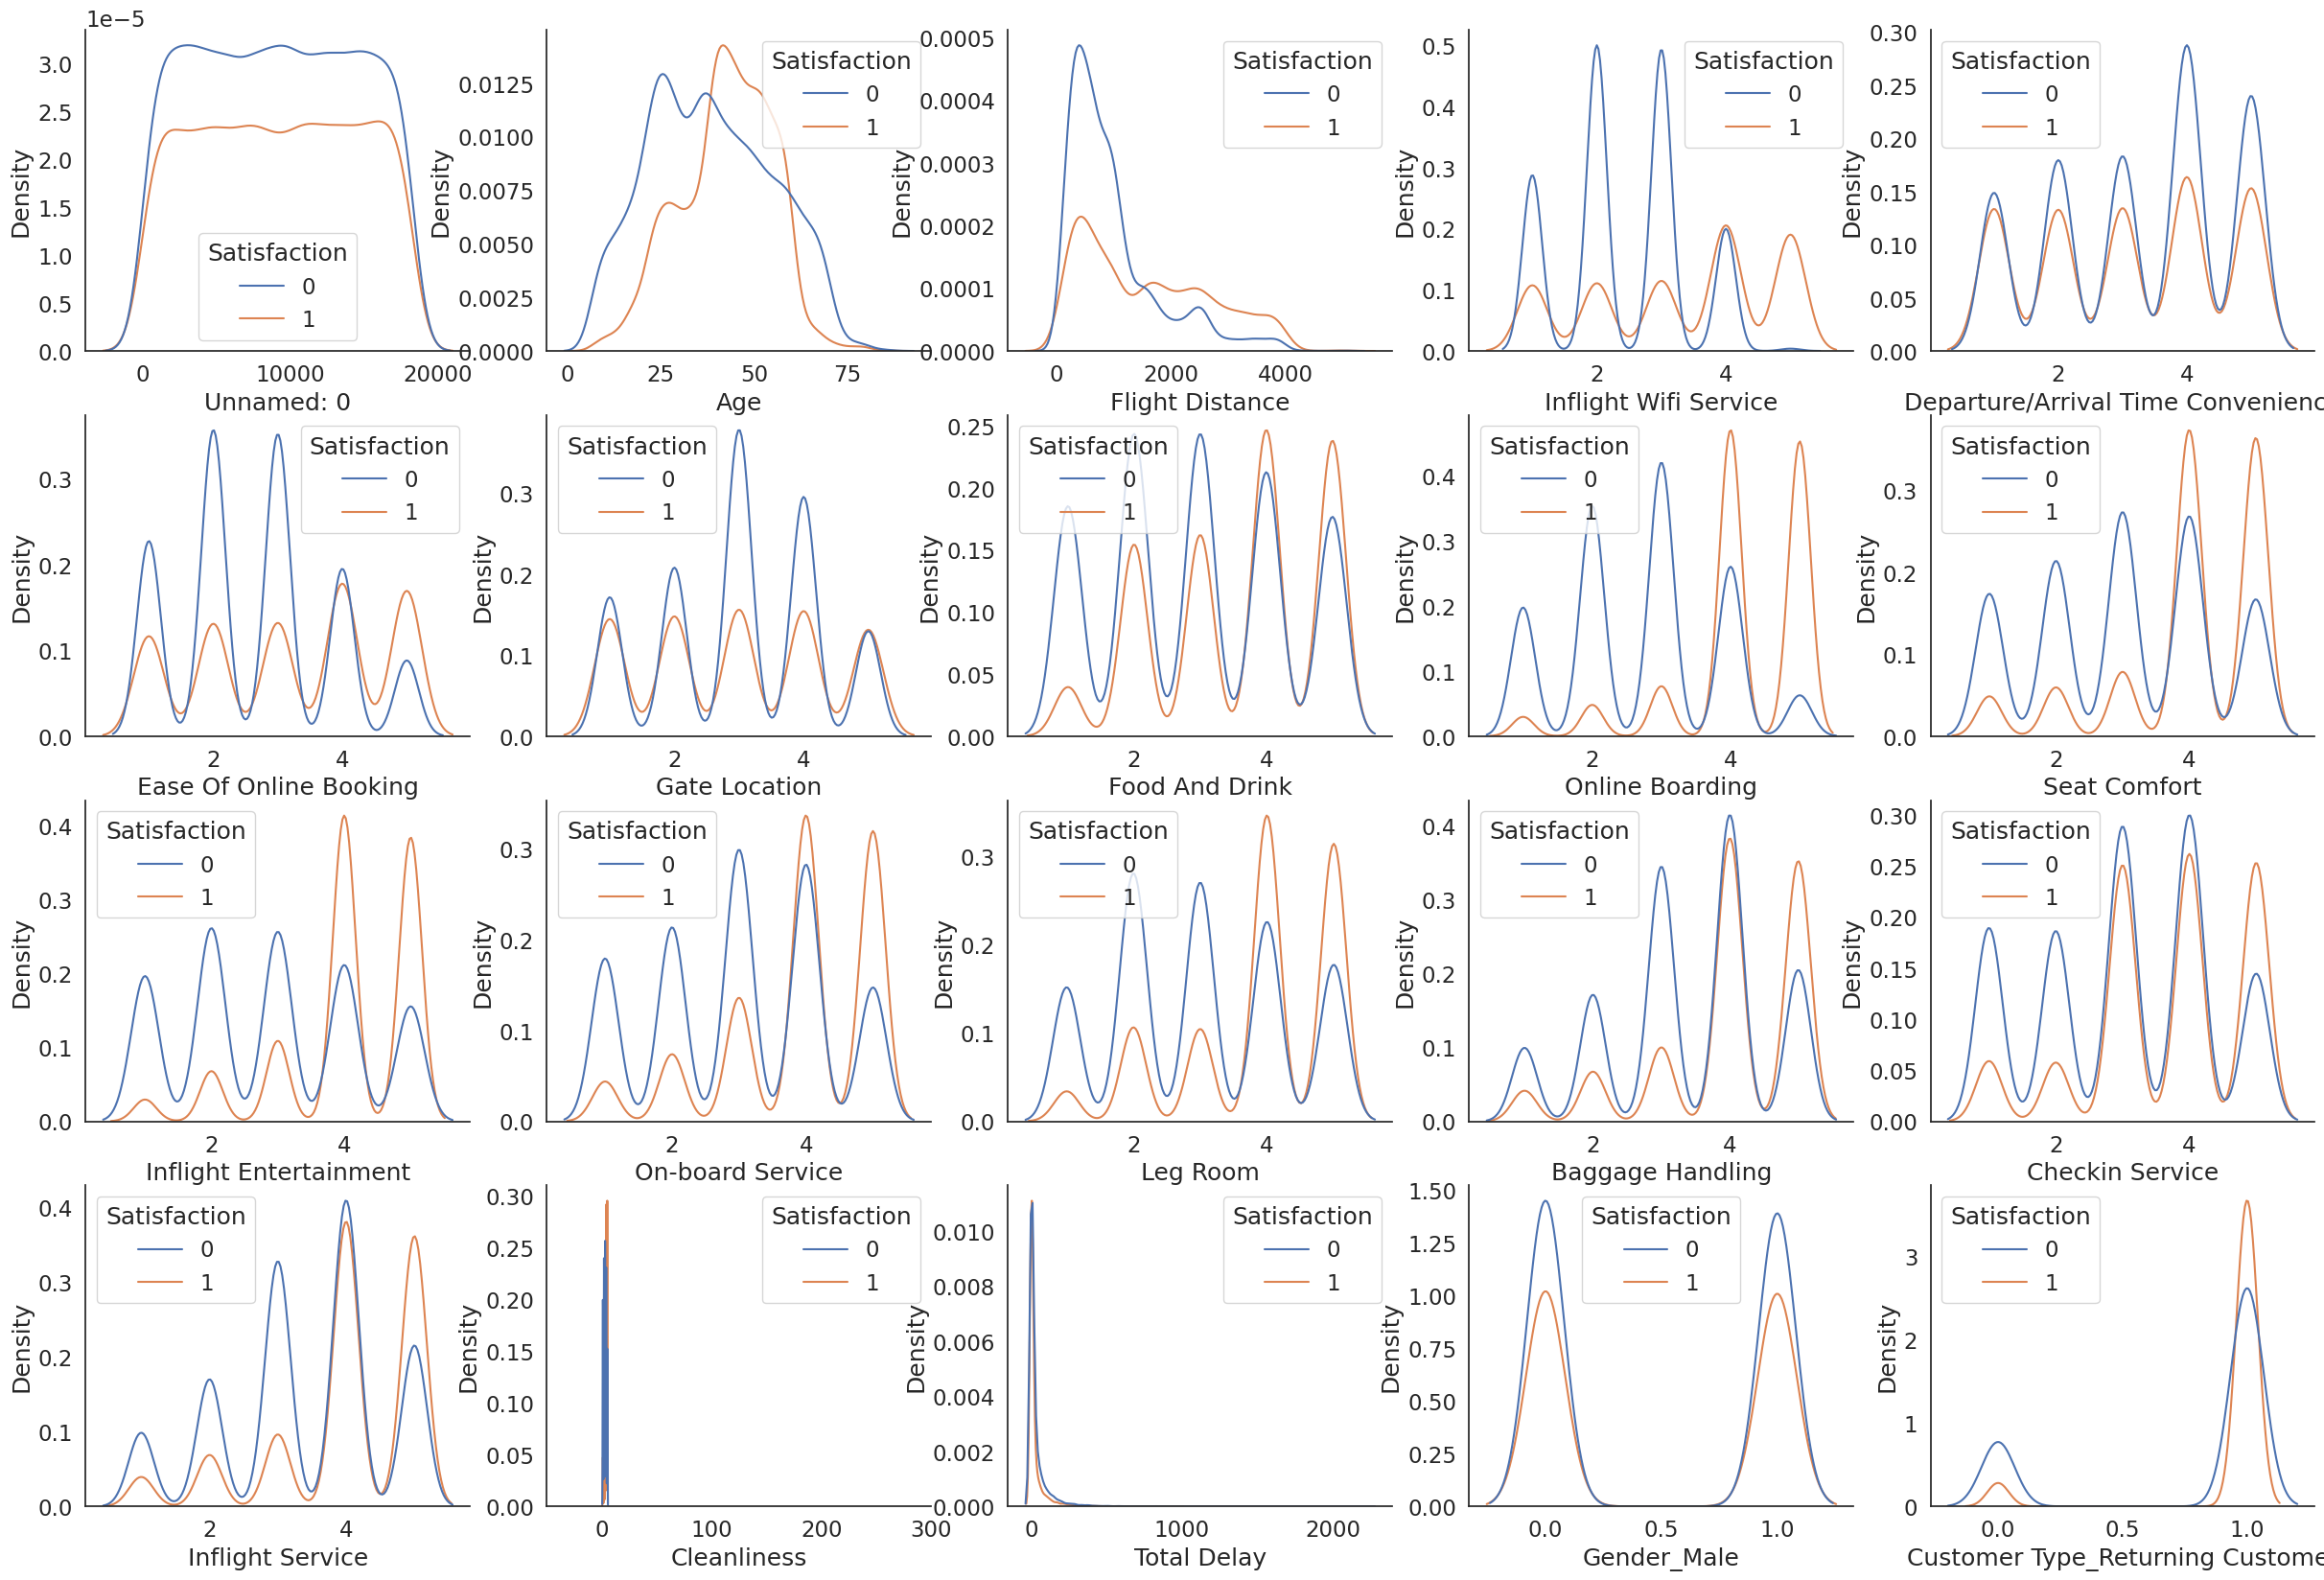

In [ ]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()
    plt.savefig('kdeplot.png',transparent=True, bbox_inches='tight')

In [ ]:
df1 = df1.drop('Gender_Male',axis=1)

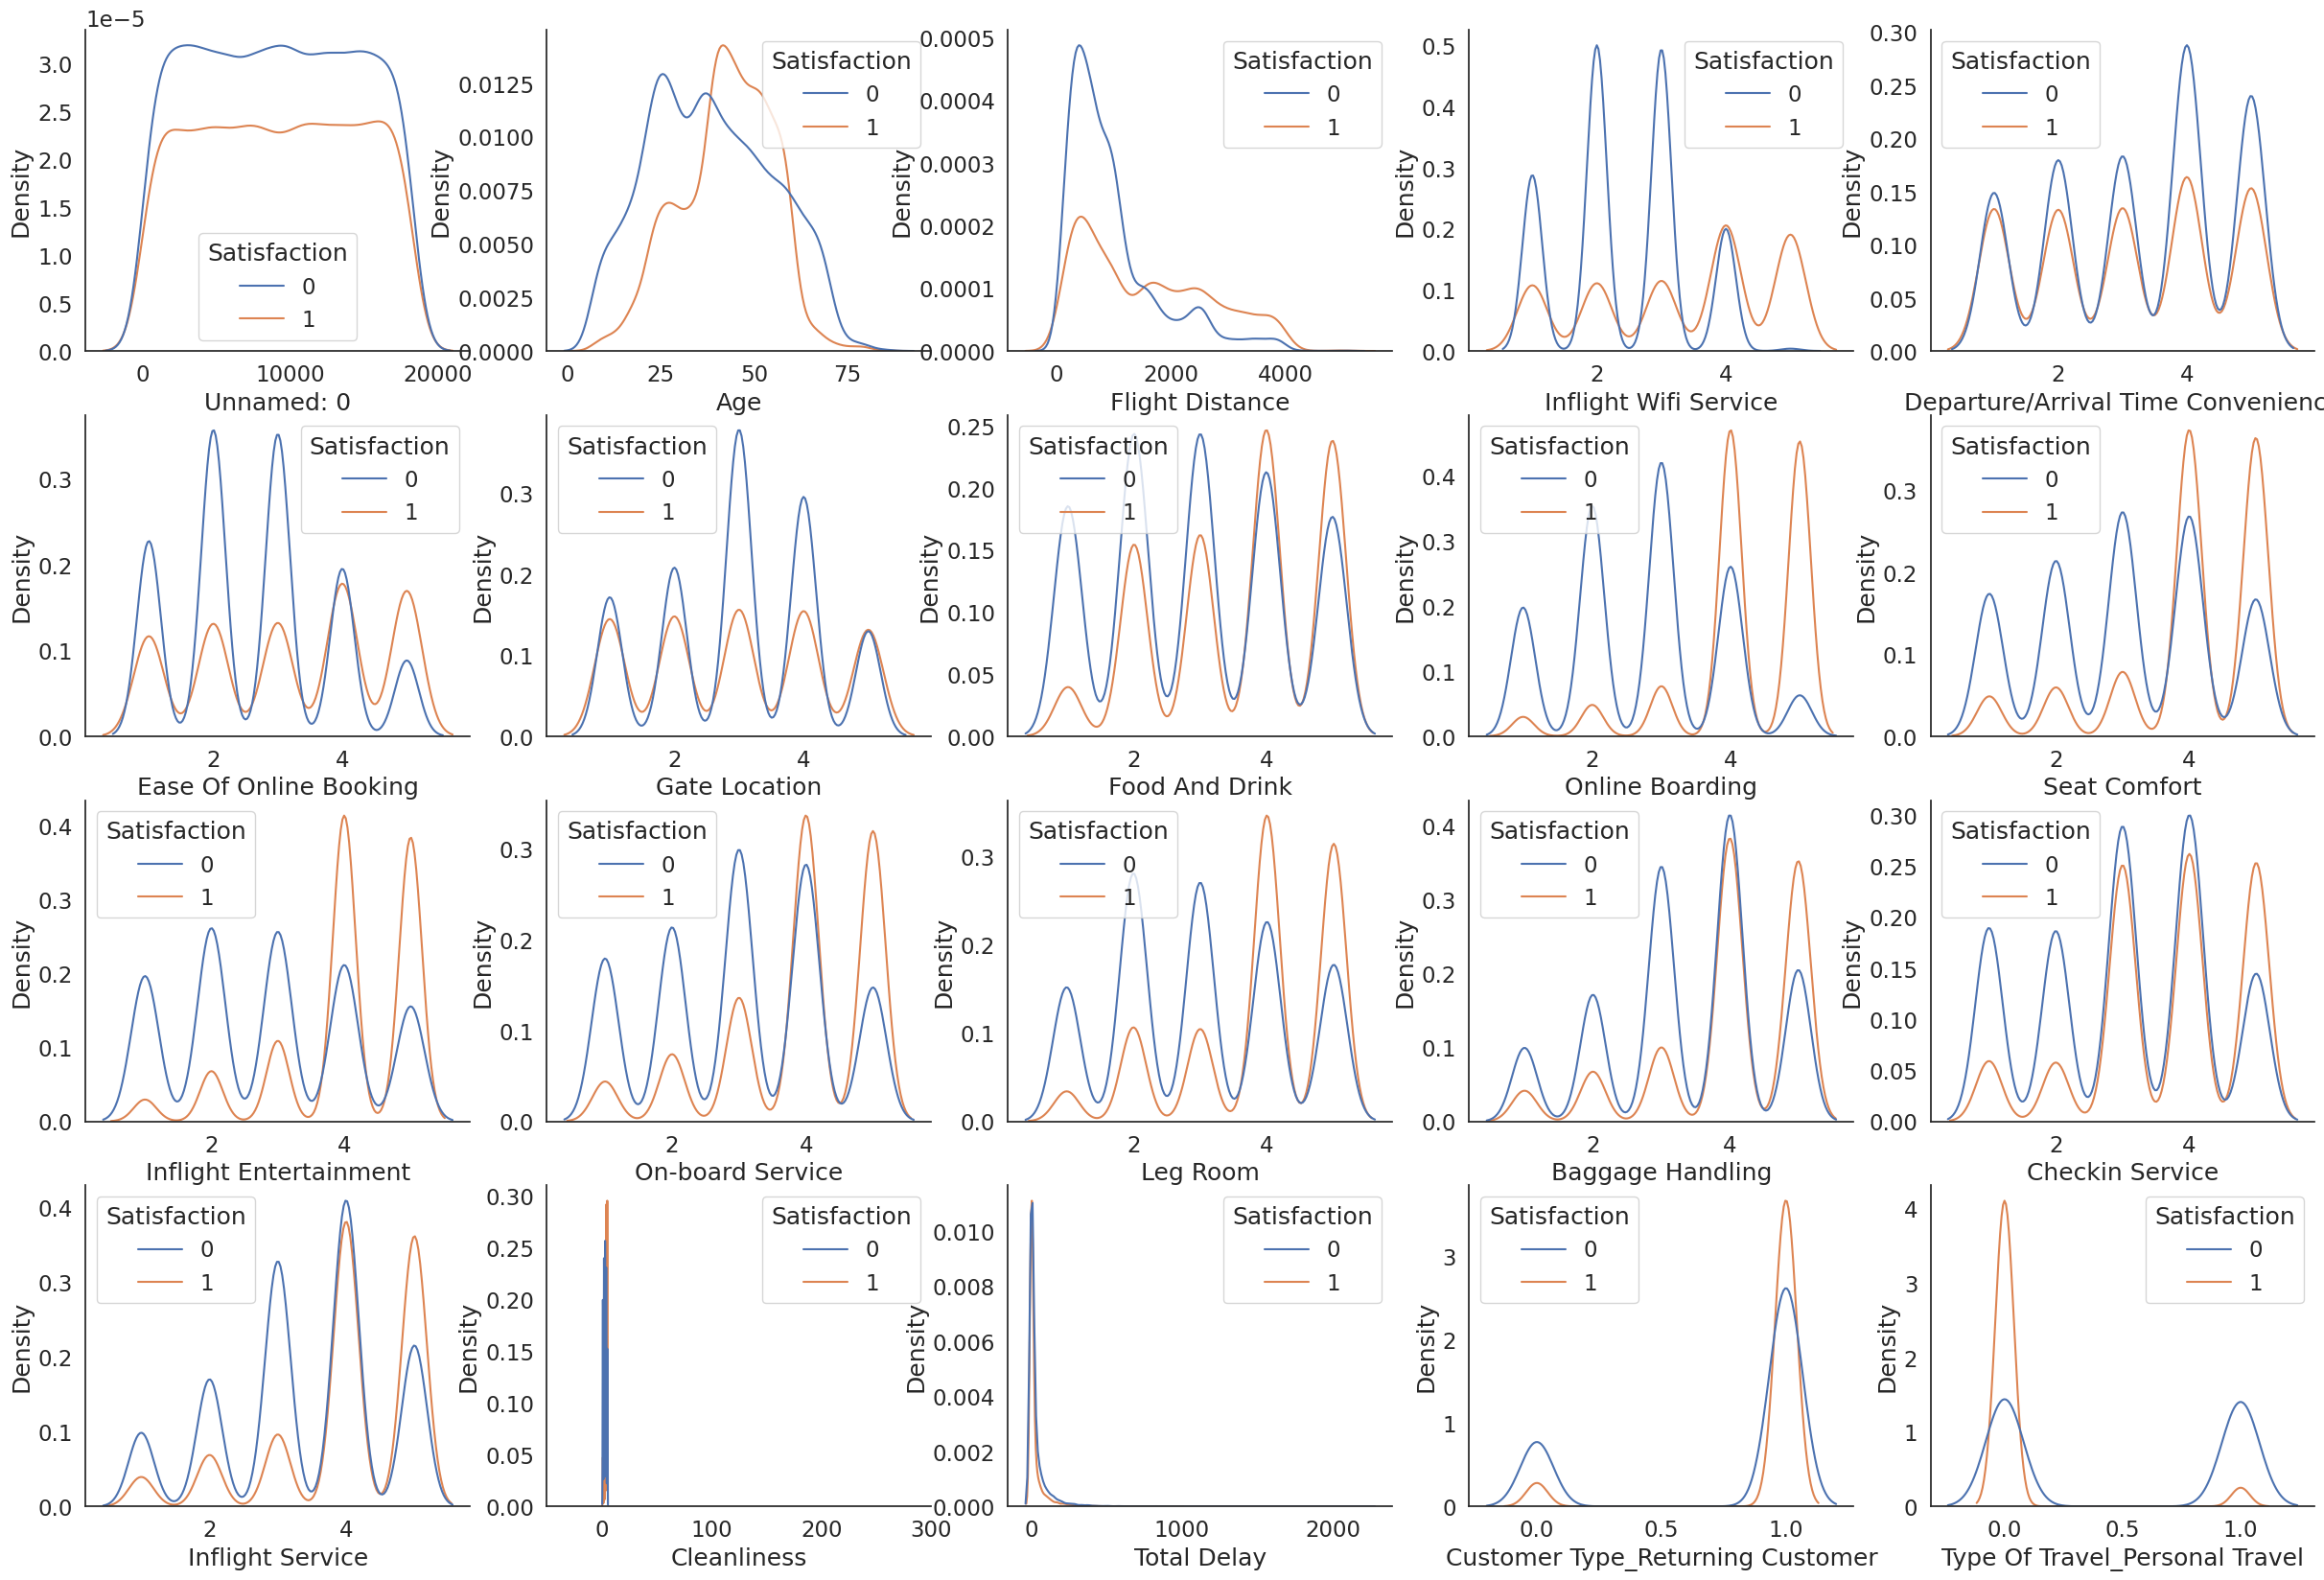

In [ ]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [ ]:
corr_matrix = df1.corr()
corr_matrix

,Satisfaction,Unnamed: 0,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,...,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
Satisfaction,1.000000,0.005713,0.141127,0.302648,0.371999,-0.064988,0.217173,-0.011662,0.235194,0.573443,...,0.343545,0.340032,0.266761,0.253690,0.264417,0.339325,-0.055526,0.211450,-0.468432,-0.503752
Unnamed: 0,0.005713,1.000000,-0.004151,-0.008125,0.001020,-0.011772,-0.001848,-0.005006,-0.012747,0.002857,...,-0.001349,-0.007483,-0.000542,-0.005654,-0.009210,-0.009319,-0.003421,-0.003844,0.002036,0.001988
Age,0.141127,-0.004151,1.000000,0.077271,0.010324,-0.026491,0.011007,-0.013299,0.026878,0.181307,...,0.068342,0.046688,-0.032466,0.036290,-0.051646,0.043092,-0.011635,0.258423,-0.048805,-0.132927
Flight Distance,0.302648,-0.008125,0.077271,1.000000,0.007245,-0.068017,0.057419,0.010566,0.058296,0.199224,...,0.129689,0.135957,0.074489,0.085219,0.071635,0.106369,0.002150,0.205152,-0.271864,-0.467535
Inflight Wifi Service,0.371999,0.001020,0.010324,0.007245,1.000000,0.387195,0.669709,0.387607,0.154032,0.453914,...,0.113809,0.151823,0.108413,0.059683,0.103718,0.152625,-0.022408,0.011513,-0.135872,-0.051401
Departure/Arrival Time Convenience,-0.064988,-0.011772,-0.026491,-0.068017,0.387195,1.000000,0.515170,0.526687,-0.023417,0.059177,...,0.072145,-0.011684,0.076393,0.103151,0.078687,-0.013172,0.001834,0.095393,0.237600,0.111286
Ease Of Online Booking,0.217173,-0.001848,0.011007,0.057419,0.669709,0.515170,1.000000,0.534936,0.023813,0.348897,...,0.030806,0.088358,0.023757,0.002275,0.018908,0.007696,-0.014693,0.027921,-0.136182,-0.120806
Gate Location,-0.011662,-0.005006,-0.013299,0.010566,0.387607,0.526687,0.534936,1.000000,-0.012590,-0.002809,...,-0.038045,-0.000423,-0.003790,-0.061481,-0.012550,-0.016683,0.009306,-0.007199,-0.035426,-0.011603
Food And Drink,0.235194,-0.012747,0.026878,0.058296,0.154032,-0.023417,0.023813,-0.012590,1.000000,0.259491,...,0.058637,0.046755,0.036523,0.078629,0.040773,0.644347,-0.024003,0.049759,-0.096730,-0.104360
Online Boarding,0.573443,0.002857,0.181307,0.199224,0.453914,0.059177,0.348897,-0.002809,0.259491,1.000000,...,0.171897,0.139943,0.100149,0.229280,0.090360,0.354511,-0.043440,0.183677,-0.228132,-0.328779


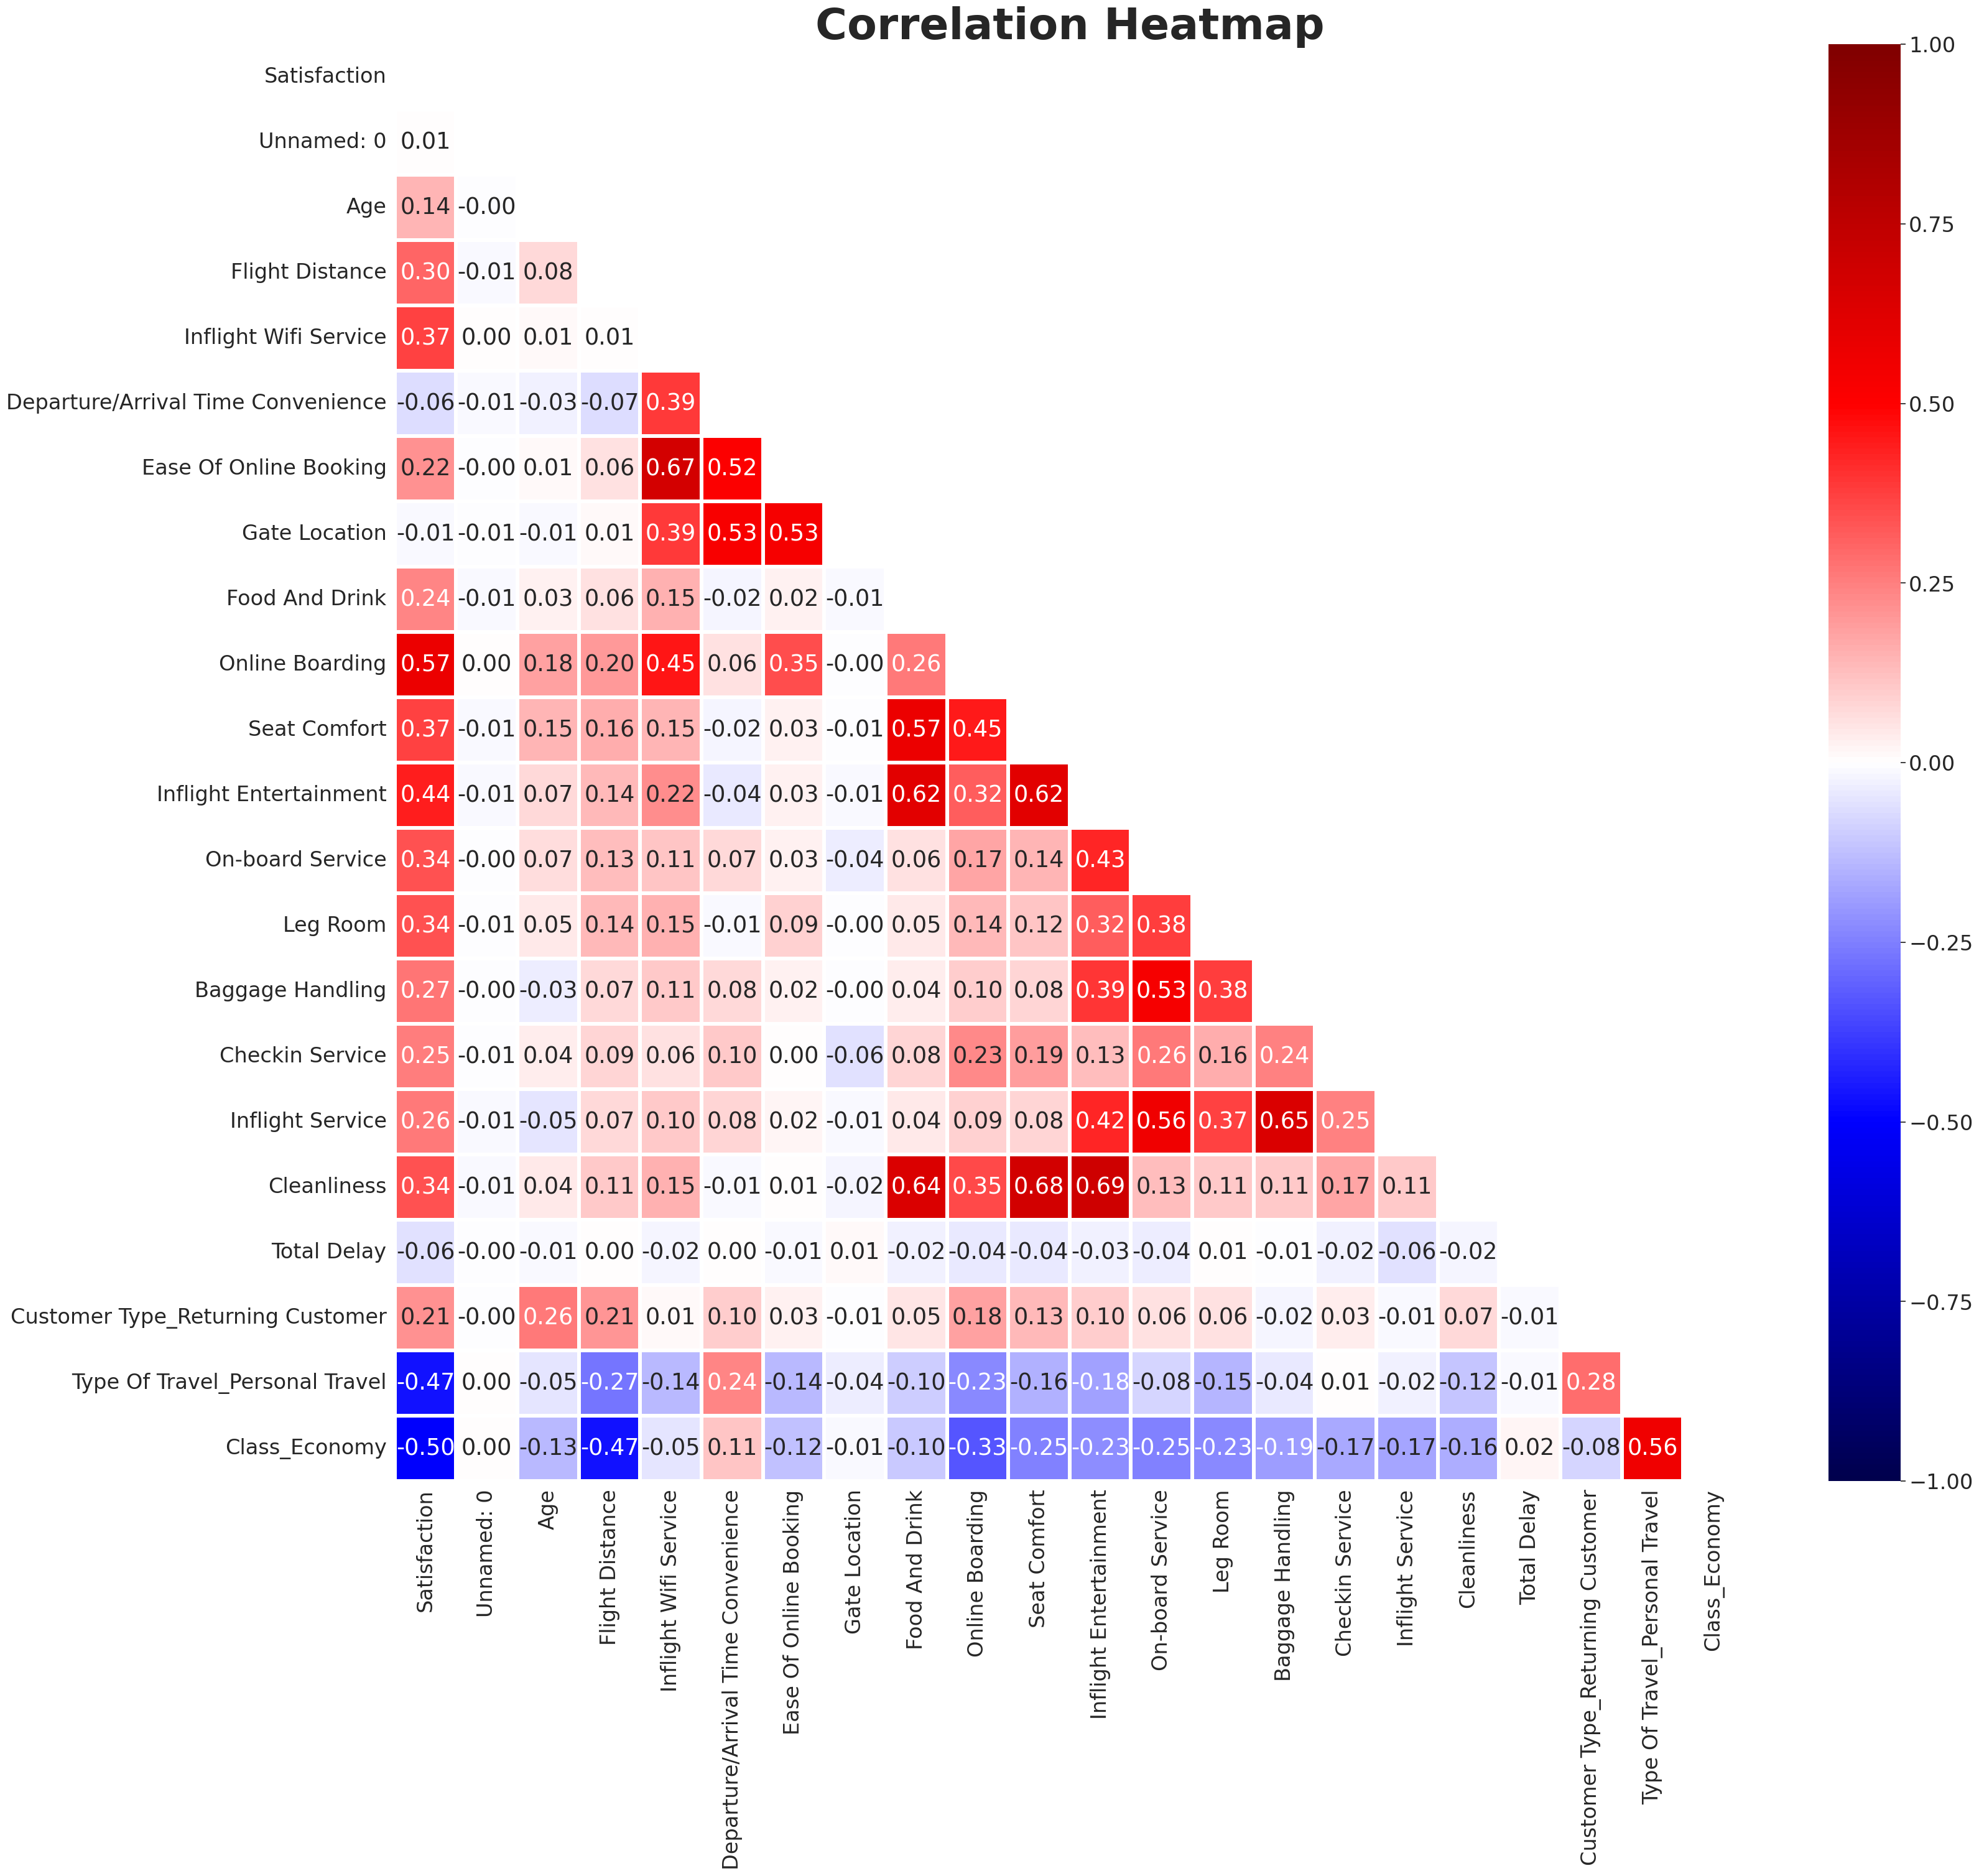

In [ ]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

In [ ]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [ ]:
std = StandardScaler()
std.fit(X.values)
X_tr = std.transform(X.values)

In [ ]:
lasso_model = Lasso(alpha = 0.01)
selected_columns = list(X.columns)
lasso_model.fit(X, y)
list(zip(selected_columns, lasso_model.coef_))

[('Unnamed: 0', 7.749998204081589e-07),
 ('Age', 0.00012949120852759387),
 ('Flight Distance', 2.636791689168703e-05),
 ('Inflight Wifi Service', 0.06755768388801149),
 ('Departure/Arrival Time Convenience', -0.02592267836428529),
 ('Ease Of Online Booking', -0.0),
 ('Gate Location', -0.008662325412191292),
 ('Food And Drink', -0.0),
 ('Online Boarding', 0.10408041929760799),
 ('Seat Comfort', 0.0),
 ('Inflight Entertainment', 0.029223296600603597),
 ('On-board Service', 0.0316903078705637),
 ('Leg Room', 0.034873562612683824),
 ('Baggage Handling', 0.01175497885945713),
 ('Checkin Service', 0.03205200049538949),
 ('Inflight Service', 0.012536328923420225),
 ('Cleanliness', 0.017696886703546317),
 ('Total Delay', -0.00019354614460631995),
 ('Customer Type_Returning Customer', 0.1952819278998554),
 ('Type Of Travel_Personal Travel', -0.28198934122419245),
 ('Class_Economy', -0.08340422891730474)]

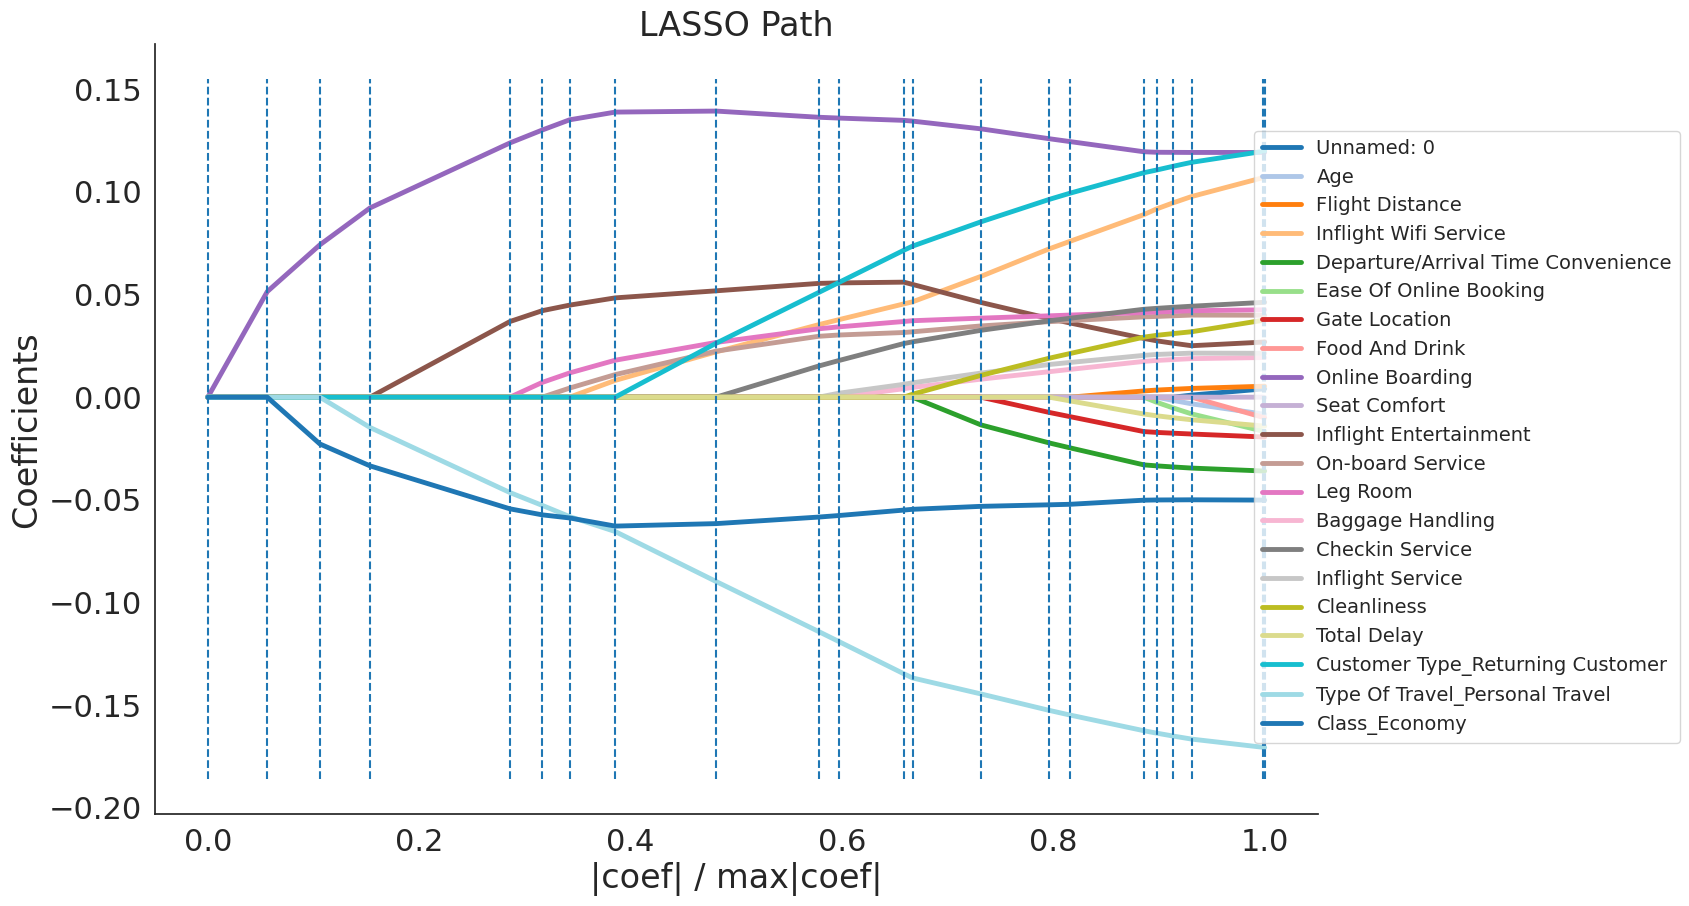

In [ ]:
alphas, _, coefs = lars_path(X_tr, y.values, method='lasso')

from cycler import cycler

# plotting the LARS path
sns.set(style='white',font_scale=2)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.rc('axes', prop_cycle =(cycler(color =['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A',
                                            '#D62728', '#FF9896', '#9467BD', '#C5B0D5', '#8C564B', '#C49C94',
                                            '#E377C2', '#F7B6D2', '#7F7F7F', '#C7C7C7', '#BCBD22', '#DBDB8D',
                                            '#17BECF', '#9EDAE5'])))

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T,linewidth=3.5)

ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X.columns,loc="upper right", bbox_to_anchor=(1.32, 0.9),fontsize=14)
sns.despine()
plt.savefig('lassoplot.png',transparent=True, bbox_inches='tight')

In [ ]:
## DROP ##
#Total Delay
#Flight Distance
#Age
#Gate Location
#df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate Location'],axis=1)
#df1 = df1.drop(['Ease Of Online Booking','Food And Drink','Gate Location','Seat Comfort'],axis=1)
#df1 = df1.drop(['Total Delay','Age','Gate Location','Departure/Arrival Time Convenience'],axis=1)
df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate Location','Departure/Arrival Time Convenience'],axis=1)

In [ ]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [ ]:
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([0.72790909])

In [ ]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV

0.9435694437526305

In [ ]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV

0.845411745057126

In [ ]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV

0.8661859652856567

In [ ]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

In [ ]:

#score = []
#for neighbors in range(5,11):
#    f1 = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=neighbors), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(neighbors)
#best_neighbors = list(range(5,11))[np.argmax(score)]
#best_f1 = max(score)
#print('The best k neighbours is {0} with f1-score of {1}'.format(best_neighbors,best_f1))   ''''''

In [ ]:
Mean_AUC_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_KNN_CV

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.5905813211767063

In [ ]:
Mean_Precision_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_KNN_CV

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.5109887817858166

In [ ]:
Mean_Recall_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_KNN_CV

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.43531620822663786

In [ ]:
Mean_AUC_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_NB_CV

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.9411221351132607

In [ ]:
Mean_Precision_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_NB_CV

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8657350974823583

In [ ]:
Mean_Recall_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_NB_CV

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.8461978480777205

In [ ]:
#score = []
#for depth in range(5,20):
#    f1 = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(depth)
#best_depth = list(range(5,20))[np.argmax(score)]
#best_f1 = max(score)
#print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1))

In [ ]:
Mean_AUC_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_tree_CV

0.9569617487585915

In [ ]:
Mean_Precision_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_tree_CV

0.9344440502207314

In [ ]:
Mean_Recall_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_tree_CV

0.917242883116233

In [ ]:
#score = []
#for depth in range(8,13):
#    f1 = np.mean(cross_val_score(RandomForestClassifier(max_depth=depth,random_state=42), X_train_val, y_train_val, cv=kf, scoring='f1'))
#    score.append(f1)
#    print(depth)
#best_depth = list(range(8,13))[np.argmax(score)]
#best_f1 = max(score)
#print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1))

In [ ]:
#parameters = {'n_estimators':[170,200,230],'max_depth':[10,15,17],'random_state':[42]}
#rf = RandomForestClassifier()
#clf = GridSearchCV(rf,parameters,scoring='f1')
#clf

In [ ]:
#clf.fit(X_train_val, y_train_val)
#clf.best_estimator_

In [ ]:
#clf.best_score_

In [ ]:
Mean_AUC_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_forest_CV

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.9892278877003816

In [ ]:
Mean_Precision_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_forest_CV

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.9540240662221675

In [ ]:
Mean_Recall_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_forest_CV

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.9264851629662457

In [ ]:
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
KNN_Model = KNeighborsClassifier(n_neighbors=7)
NB_Model = GaussianNB()
Tree_Model = DecisionTreeClassifier(max_depth=12)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,KNN_Model,NB_Model,Tree_Model,Forest_Model]
model_names = ["log_model", "knn_model", "nb_model", "tree_model", "forest_model"]
model = list(zip(model_names, model_list))

In [ ]:
Mean_AUC_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_ensemble_CV

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

0.9799265645587601

In [ ]:
Mean_Precision_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_ensemble_CV

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

0.9361589409399164

In [ ]:
Mean_Recall_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_ensemble_CV

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

0.907571053328011

In [ ]:
model = ['Logistic Regression','KNN','Gaussian NB','Decision Trees','Random Forest','Ensemble']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','KNN','NB','tree','forest','ensemble']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [ ]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.943569
1,Logistic Regression,Precision,0.845412
2,Logistic Regression,Recall,0.866186
3,KNN,AUC,0.590581
4,KNN,Precision,0.510989
5,KNN,Recall,0.435316
6,Gaussian NB,AUC,0.941122
7,Gaussian NB,Precision,0.865735
8,Gaussian NB,Recall,0.846198
9,Decision Trees,AUC,0.956962


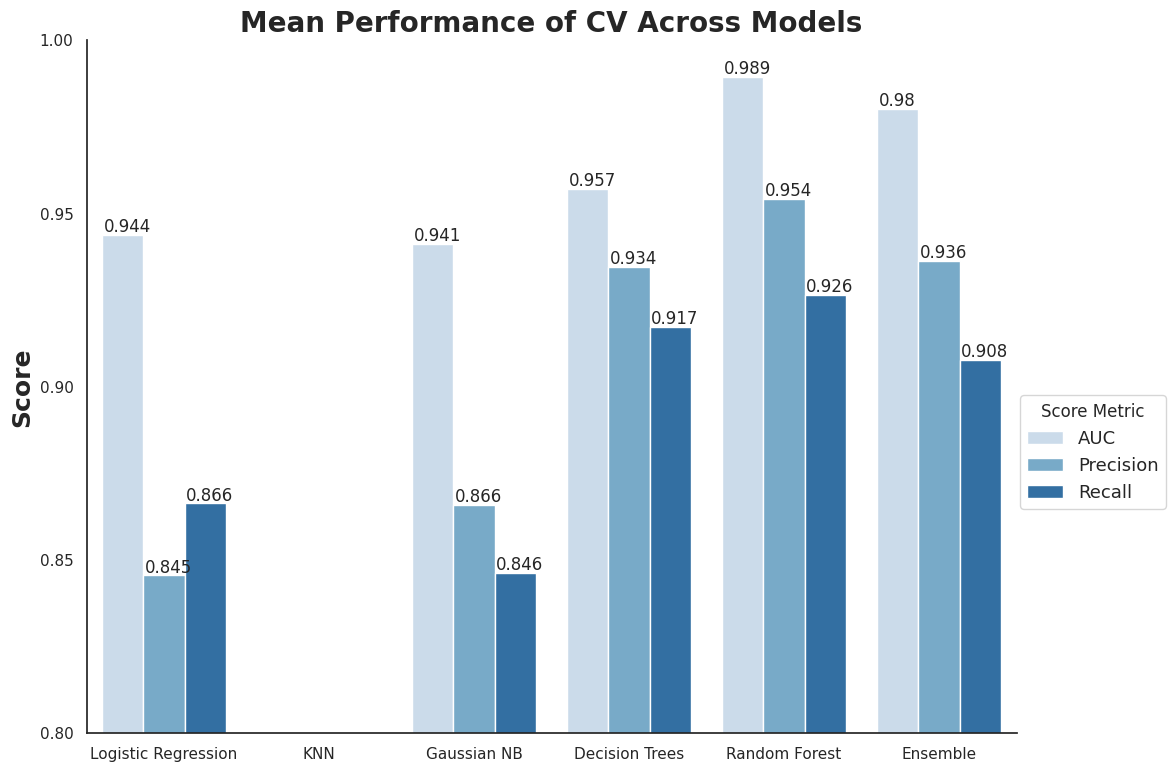

In [ ]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Blues')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()
plt.savefig('modelbarplot.png',transparent=True, bbox_inches='tight')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=42)

In [ ]:
rf = RandomForestClassifier(max_depth=17, random_state=42)
rf.fit(X_train,y_train)
print("Random Forest score: {:.4f}".format(rf.score(X_train,y_train)))

<ipython-input-69-d102a7022bac>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Random Forest score: 0.9970


In [ ]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.5
precision_05 = precision_score(y_val, y_predict)
precision_05

0.9497126436781609

In [ ]:
recall_05=recall_score(y_val, y_predict)
recall_05

0.9322990126939351

In [ ]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.7
precision_07 = precision_score(y_val, y_predict)
precision_07

0.9803459119496856

In [ ]:


recall_07=recall_score(y_val, y_predict)
recall_07

0.8794076163610719

In [ ]:
roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])

0.9894943221327738

In [ ]:
SV_model = [{'Scoring':'Precision','Threshold':0.5,'Score':precision_05},{'Scoring':'Precision','Threshold':0.7,'Score':precision_07},{'Scoring':'Recall','Threshold':0.5,'Score':recall_05},{'Scoring':'Recall','Threshold':0.7,'Score':recall_07}]
SV_model = pd.DataFrame(SV_model)
SV_model

,Scoring,Threshold,Score
0,Precision,0.5,0.949713
1,Precision,0.7,0.980346
2,Recall,0.5,0.932299
3,Recall,0.7,0.879408


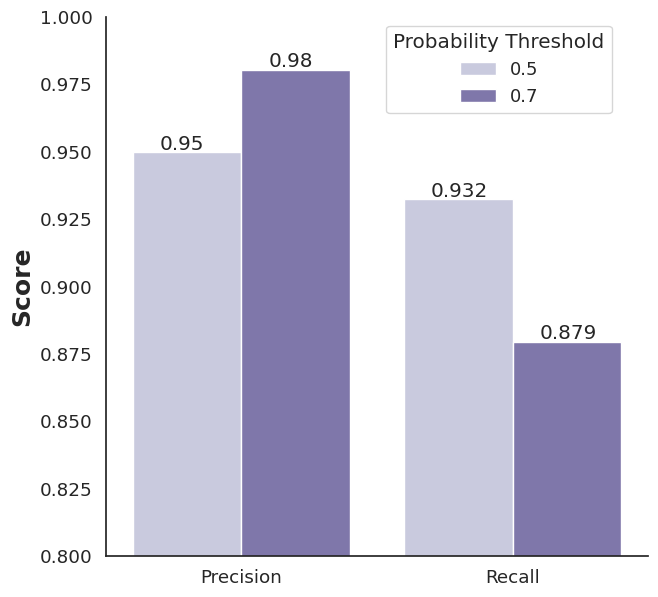

In [ ]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[7,7])
ax = sns.barplot(x='Scoring',y='Score',data=SV_model,hue='Threshold',palette='Purples')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.1, p.get_height()+0.001))
plt.legend(title='Probability Threshold',loc="upper right", bbox_to_anchor=(0.95, 1),fontsize=13)
plt.ylim([0.8,1.0])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
sns.despine()
plt.savefig('probabilityplot.png',transparent=True, bbox_inches='tight')